<a href="https://colab.research.google.com/github/ArinaWhyNot/myfirstrep/blob/main/Lecture05_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задачи к Лекции 5

Дан файл "Anuran_Calls_(MFCCs).zip", в котором содержится обработка звуков издаваемых различными видами лягушек. В качестве признаков выступают мел-кепстральные коэффициенты __[MFCC](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum)__

**Чтение данных**

In [ ]:
%matplotlib inline
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

zip_path = "Anuran_Calls_(MFCCs).zip"

# Открываем ZIP и читаем CSV
with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open("Frogs_MFCCs.csv") as f:
        df = pd.read_csv(f)

print(df.head())

   MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0       1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1       1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2       1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3       1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4       1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   

   MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_17  MFCCs_18  MFCCs_19  MFCCs_20  \
0 -0.150063 -0.171128  0.124676  ... -0.108351 -0.077623 -0.009568  0.057684   
1 -0.222475 -0.207693  0.170883  ... -0.090974 -0.056510 -0.035303  0.020140   
2 -0.242234 -0.219153  0.232538  ... -0.050691 -0.023590 -0.066722 -0.025083   
3 -0.194347 -0.098181  0.270375  ... -0.136009 -0.177037 -0.130498 -0.054766   
4 -0.265423 -0.172700  0.266434  ... -0.048885 -0.053074 -0.088550 -0.031346   

   MFCCs_21  MFCCs_22           Family      Genus         Species  R

In [ ]:
df.loc[:,"MFCCs_ 1": "MFCCs_ 2"]

,MFCCs_ 1,MFCCs_ 2
0,1.0,0.152936
1,1.0,0.171534
2,1.0,0.152317
3,1.0,0.224392
4,1.0,0.087817
...,...,...
7190,1.0,-0.554504
7191,1.0,-0.517273
7192,1.0,-0.582557
7193,1.0,-0.519497


**Получение различной информации**

In [ ]:
df.shape

(7195, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MFCCs_ 1  7195 non-null   float64
 1   MFCCs_ 2  7195 non-null   float64
 2   MFCCs_ 3  7195 non-null   float64
 3   MFCCs_ 4  7195 non-null   float64
 4   MFCCs_ 5  7195 non-null   float64
 5   MFCCs_ 6  7195 non-null   float64
 6   MFCCs_ 7  7195 non-null   float64
 7   MFCCs_ 8  7195 non-null   float64
 8   MFCCs_ 9  7195 non-null   float64
 9   MFCCs_10  7195 non-null   float64
 10  MFCCs_11  7195 non-null   float64
 11  MFCCs_12  7195 non-null   float64
 12  MFCCs_13  7195 non-null   float64
 13  MFCCs_14  7195 non-null   float64
 14  MFCCs_15  7195 non-null   float64
 15  MFCCs_16  7195 non-null   float64
 16  MFCCs_17  7195 non-null   float64
 17  MFCCs_18  7195 non-null   float64
 18  MFCCs_19  7195 non-null   float64
 19  MFCCs_20  7195 non-null   float64
 20  MFCCs_21  7195 non-null   floa

In [ ]:
df.describe()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,RecordID
count,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,...,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000
mean,0.989885,0.323584,0.311224,0.445997,0.127046,0.097939,-0.001397,-0.000370,0.128213,0.055998,...,-0.039244,-0.101748,0.042062,0.088680,0.007755,-0.049474,-0.053244,0.037313,0.087567,25.220014
std,0.069016,0.218653,0.263527,0.160328,0.162722,0.120412,0.171404,0.116302,0.179008,0.127099,...,0.152515,0.187618,0.119915,0.138055,0.084733,0.082546,0.094181,0.079470,0.123442,13.214399
min,-0.251179,-0.673025,-0.436028,-0.472676,-0.636012,-0.410417,-0.538982,-0.576506,-0.587313,-0.952266,...,-0.590380,-0.717156,-0.498675,-0.421480,-0.759322,-0.680745,-0.361649,-0.430812,-0.379304,1.000000
25%,1.000000,0.165945,0.138445,0.336737,0.051717,0.012581,-0.125737,-0.063109,0.004648,-0.001132,...,-0.132980,-0.255929,-0.019549,-0.001764,-0.042122,-0.106079,-0.120971,-0.017620,0.000533,15.000000
50%,1.000000,0.302184,0.274626,0.481463,0.161361,0.072079,-0.052630,0.013265,0.189317,0.063478,...,-0.050715,-0.143259,0.041081,0.112769,0.011820,-0.052626,-0.055180,0.031274,0.105373,22.000000
75%,1.000000,0.466566,0.430695,0.559861,0.222592,0.175957,0.085580,0.075108,0.265395,0.117725,...,0.039157,0.017348,0.107046,0.201932,0.061889,0.006321,0.001342,0.089619,0.194819,37.000000
max,1.000000,1.000000,1.000000,1.000000,0.752246,0.964240,1.000000,0.551762,0.738033,0.522768,...,0.575749,0.668924,0.670700,0.681157,0.614064,0.574209,0.467831,0.389797,0.432207,60.000000


**1. Нормализовать данные**

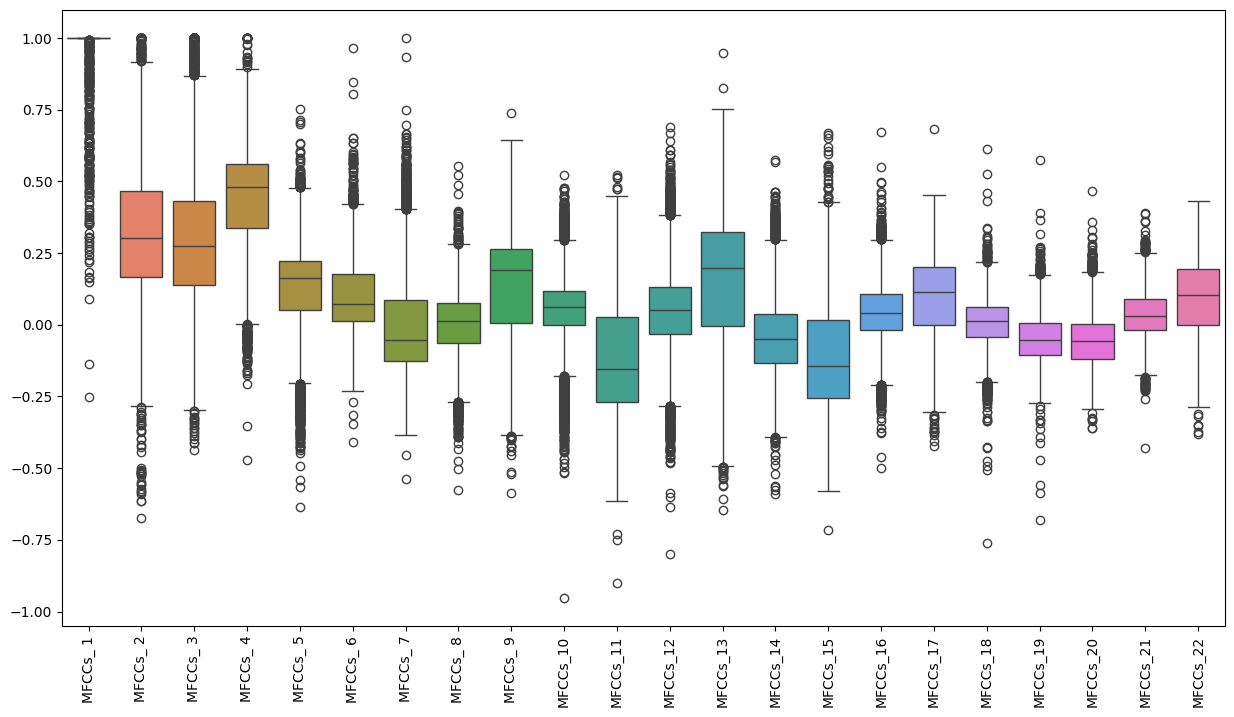

Результаты теста Shapiro-Wilk:
          statistic       p-value
MFCCs_ 1   0.136597  2.094184e-92
MFCCs_ 7   0.895972  7.071084e-50
MFCCs_ 9   0.911957  4.313776e-47
MFCCs_15   0.941534  1.314837e-40
MFCCs_ 5   0.950255  3.470235e-38
MFCCs_13   0.953342  3.012310e-37
MFCCs_10   0.953875  4.425918e-37
MFCCs_17   0.953924  4.586247e-37
MFCCs_11   0.955120  1.102421e-36
MFCCs_22   0.955568  1.538437e-36
MFCCs_ 6   0.959459  3.131125e-35
MFCCs_ 4   0.963257  7.452181e-34
MFCCs_ 3   0.964013  1.443616e-33
MFCCs_ 2   0.978276  5.500855e-27
MFCCs_14   0.982044  1.066394e-24
MFCCs_12   0.982147  1.245535e-24
MFCCs_18   0.985112  1.487864e-22
MFCCs_ 8   0.985145  1.575916e-22
MFCCs_16   0.987982  3.137603e-20
MFCCs_20   0.988745  1.521094e-19
MFCCs_19   0.988878  2.014445e-19
MFCCs_21   0.992319  8.285141e-16


In [ ]:
#проверяем данные на выбросы
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.boxplot(data=df.filter(regex='MFCCs_'))
plt.xticks(rotation=90)
plt.show()
#выбросы есть, так что нужно сделать нормализацию

#также надо проверить, нормальное ли распределение у данных
from scipy.stats import shapiro

normality_report = {}
for col in df.filter(regex='MFCCs_').columns:
    stat, p = shapiro(df[col].sample(min(5000, len(df))))  # Ограничение на размер выборки
    normality_report[col] = {'statistic': stat, 'p-value': p}

normality_df = pd.DataFrame(normality_report).T
print("Результаты теста Shapiro-Wilk:")
print(normality_df.sort_values('p-value'))
#p-value < 0.5 => распределение ненормальное

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

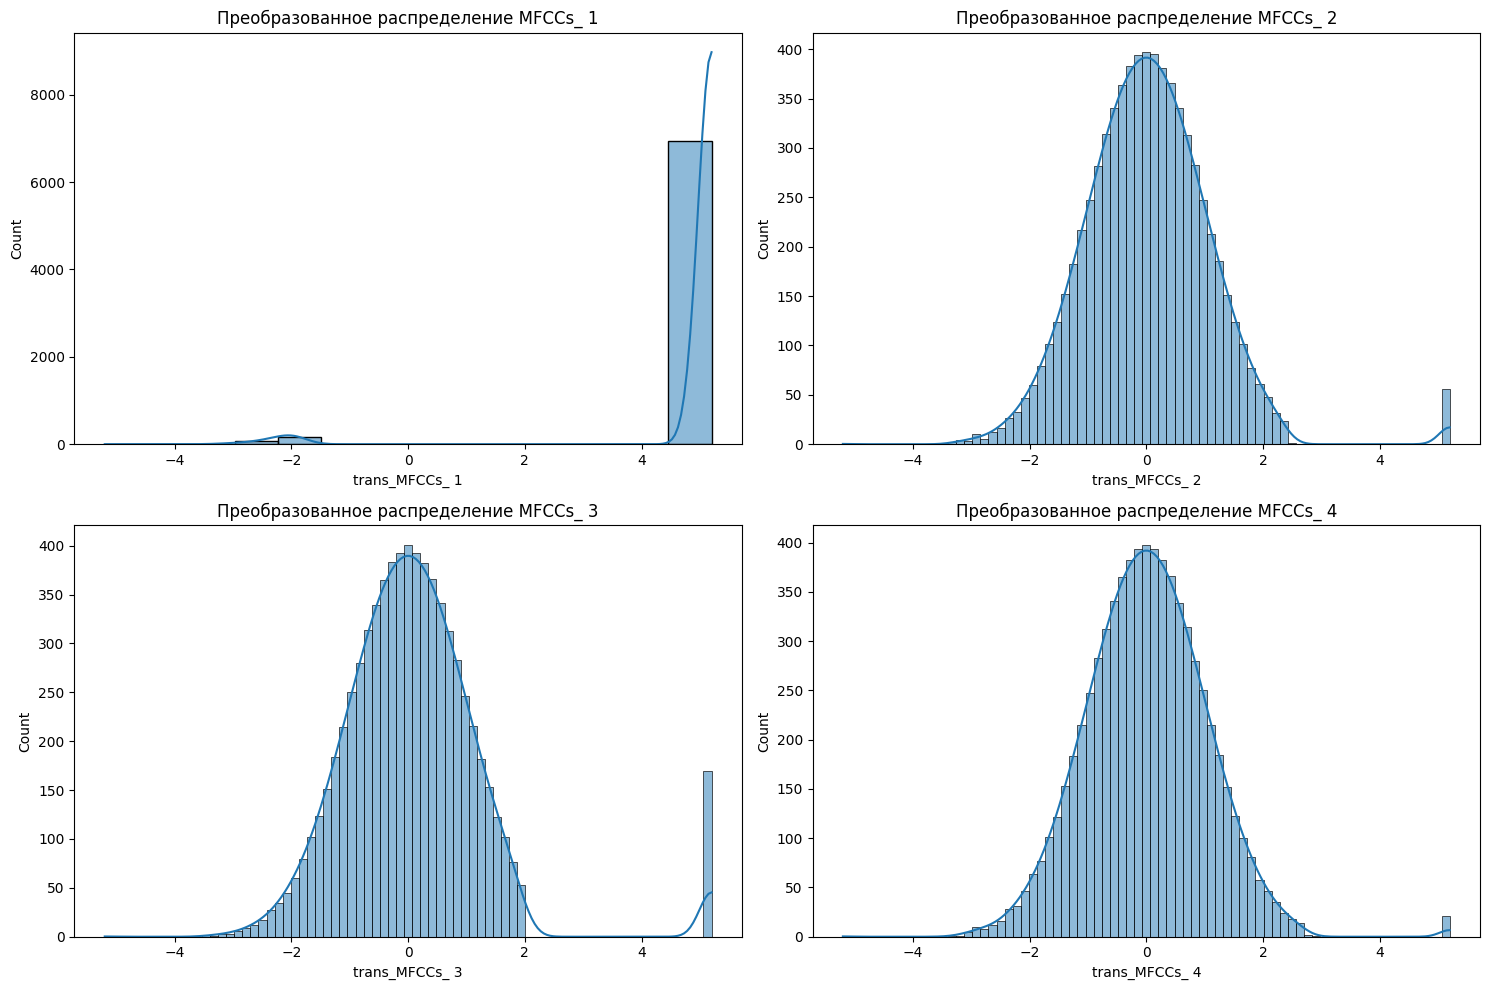

Выбросы после преобразования:
trans_MFCCs_ 1    248
trans_MFCCs_ 3    195
trans_MFCCs_ 2     81
trans_MFCCs_15     54
trans_MFCCs_ 6     53
trans_MFCCs_ 4     52
trans_MFCCs_22     52
trans_MFCCs_ 7     52
trans_MFCCs_14     52
trans_MFCCs_10     52
trans_MFCCs_11     52
trans_MFCCs_21     52
trans_MFCCs_18     51
trans_MFCCs_ 8     51
trans_MFCCs_ 5     50
trans_MFCCs_19     50
trans_MFCCs_12     50
trans_MFCCs_17     50
trans_MFCCs_13     49
trans_MFCCs_ 9     48
trans_MFCCs_16     47
trans_MFCCs_20     47
dtype: int64


In [ ]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

#загружаем и подготавливаем данные
mfcc_cols = [col for col in df.columns if col.startswith('MFCCs_')]
X = df[mfcc_cols]

#используем QuantileTransformer, так как наши данные не нормальные
qt = QuantileTransformer(output_distribution='normal', random_state=42)
X_transformed = qt.fit_transform(X)

#df с преобразованными данными
transformed_df = pd.DataFrame(X_transformed, columns=[f'trans_{col}' for col in mfcc_cols])

#визуализация
plt.figure(figsize=(15, 10))
for i, col in enumerate(mfcc_cols[:4], 1):
    plt.subplot(2, 2, i)
    sns.histplot(transformed_df[f'trans_{col}'], kde=True)
    plt.title(f'Преобразованное распределение {col}')
plt.tight_layout()
plt.show()

#добавляем категориальные признаки
final_df = pd.concat([
    transformed_df,
    df[['Family', 'Genus', 'Species', 'RecordID']]
], axis=1)

#проверяем выбросы после преобразования
Q1 = transformed_df.quantile(0.25)
Q3 = transformed_df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((transformed_df < (Q1 - 1.5 * IQR)) | (transformed_df > (Q3 + 1.5 * IQR)))
print("Выбросы после преобразования:")
print(outliers.sum().sort_values(ascending=False))

**2. Построить бинарный классификатор для каждого семейства(Family) на основе LogisticRegression c $l_1$ и $l_2$ регуляризацими. Это соответствует целевым исходам (Конкретное семейство, Всё остальное). Подобрать гиперпараметр $C$ с помощью кросс-валидации, используя метрику ROC AUC.**

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Лучшие параметры:
{'clf__estimator__C': np.float64(1.0), 'clf__estimator__class_weight': 'balanced', 'clf__estimator__penalty': 'l2'}
Семейство Bufonidae: ROC AUC = 0.990
Семейство Dendrobatidae: ROC AUC = 0.993
Семейство Hylidae: ROC AUC = 0.964
Семейство Leptodactylidae: ROC AUC = 0.987


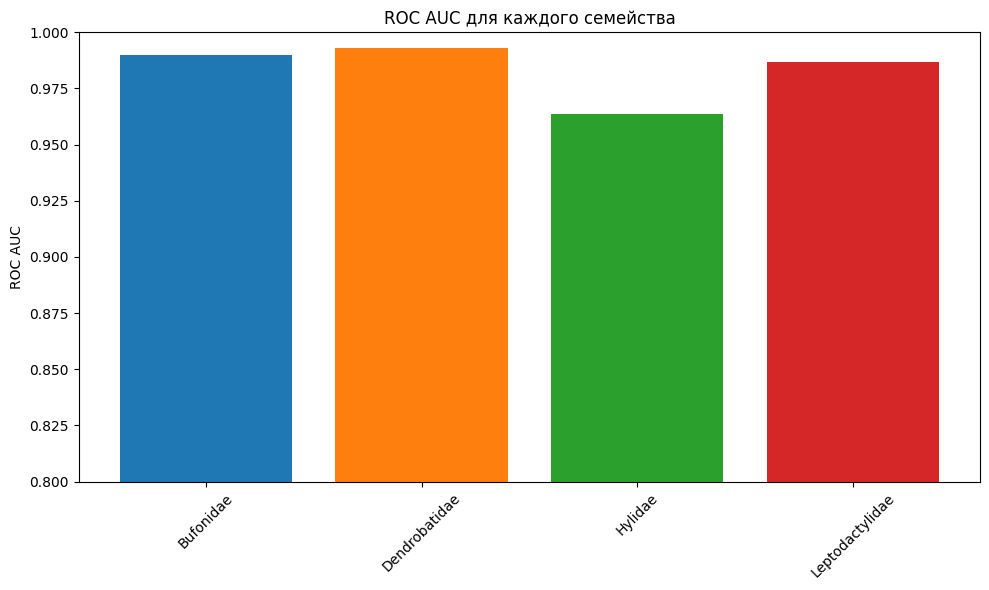

In [ ]:
# Your code here
from sklearn.preprocessing import QuantileTransformer, LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier

mfcc_cols = [col for col in df.columns if col.startswith('MFCCs_')]
X = df[mfcc_cols]
y = df['Family']

#разделяем на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

#преобразуем метки в бинарный формат
lb = LabelBinarizer()
y_train_bin = lb.fit_transform(y_train)
y_test_bin = lb.transform(y_test)

#создаем пайплайн с QuantileTransformer
pipeline = Pipeline([
    ('scaler', QuantileTransformer(output_distribution='normal')),
    ('clf', OneVsRestClassifier(LogisticRegression(solver='liblinear', max_iter=1000)))
])

#параметры для GridSearchCV
param_grid = {
    'clf__estimator__penalty': ['l1', 'l2'],
    'clf__estimator__C': np.logspace(-3, 3, 7),
    'clf__estimator__class_weight': ['balanced', None]
}

#создаем и обучаем GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train_bin)

#выводим лучшие параметры
print("Лучшие параметры:")
print(grid_search.best_params_)

#предсказание на тестовых данных
y_pred_proba = grid_search.predict_proba(X_test)

#расчет ROC AUC для каждого класса
for i, family in enumerate(lb.classes_):
    auc = roc_auc_score(y_test_bin[:, i], y_pred_proba[:, i])
    print(f"Семейство {family}: ROC AUC = {auc:.3f}")

#визуализация результатов
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for i, family in enumerate(lb.classes_):
    auc = roc_auc_score(y_test_bin[:, i], y_pred_proba[:, i])
    plt.bar(family, auc)
plt.title('ROC AUC для каждого семейства')
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)
plt.ylabel('ROC AUC')
plt.tight_layout()
plt.show()

**3. Добавить полиномиальные признаки до второго порядка. Построить бинарный классификатор для каждого семейства на основе LogisticRegression c $l_1$ и $l_2$ регуляризацими. Подобрать гиперпараметр $C$ с помощью кросс-валидации, используя метрику ROC AUC.**

Fitting 5 folds for each of 56 candidates, totalling 280 fits
Лучшие параметры:
{'clf__estimator__C': np.float64(0.1), 'clf__estimator__class_weight': None, 'clf__estimator__penalty': 'l1', 'poly__interaction_only': True}
Семейство Leptodactylidae: ROC AUC = 0.261
Семейство Hylidae: ROC AUC = 0.685
Семейство Dendrobatidae: ROC AUC = 0.480
Семейство Bufonidae: ROC AUC = 0.221


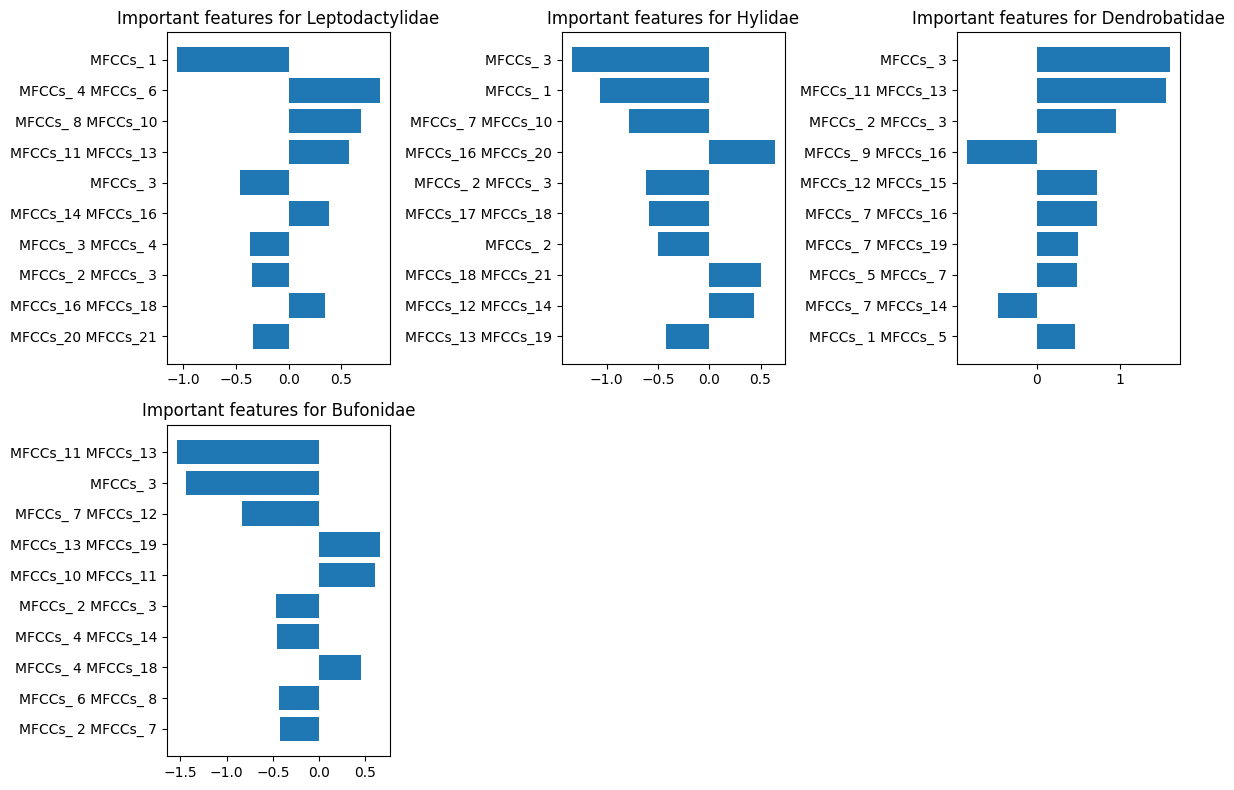

In [11]:
from sklearn.preprocessing import QuantileTransformer, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

#выделяем признаки и целевую переменную
mfcc_cols = [col for col in df.columns if col.startswith('MFCCs_')]
X = df[mfcc_cols]
y = df['Family']

#разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

#создаем пайплайн с добавлением полиномиальных признаков
pipeline = Pipeline([
    ('scaler', QuantileTransformer(output_distribution='normal')),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('clf', OneVsRestClassifier(LogisticRegression(solver='liblinear', max_iter=1000)))
])

#параметры для GridSearchCV
param_grid = {
    'clf__estimator__penalty': ['l1', 'l2'],
    'clf__estimator__C': np.logspace(-3, 3, 7),
    'clf__estimator__class_weight': ['balanced', None],
    'poly__interaction_only': [True, False]
}

#создаем и обучаем GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, pd.get_dummies(y_train))

#лучшие параметры
print("Лучшие параметры:")
print(grid_search.best_params_)

#предсказание на тестовых данных
y_pred_proba = grid_search.predict_proba(X_test)

#расчет ROC AUC для каждого класса
for i, family in enumerate(y_test.unique()):
    auc = roc_auc_score((y_test == family).astype(int), y_pred_proba[:, i])
    print(f"Семейство {family}: ROC AUC = {auc:.3f}")  # Исправленная строка

#визуализация важности признаков для лучшей модели
fitted_pipeline = grid_search.best_estimator_
feature_names = fitted_pipeline.named_steps['poly'].get_feature_names_out(mfcc_cols)

# Visualization
plt.figure(figsize=(12, 8))
for i, family in enumerate(y_test.unique()[:6]):  # limit to 6 families
    coef = fitted_pipeline.named_steps['clf'].estimators_[i].coef_[0]
    top_idx = np.argsort(np.abs(coef))[-10:]  # top 10 features
    plt.subplot(2, 3, i+1)
    plt.barh(feature_names[top_idx], coef[top_idx])
    plt.title(f'Important features for {family}')
plt.tight_layout()
plt.show()